In [34]:
import os
import numpy as np
from phathom import io
from phathom.phenotype import celltype
from phathom import plotting
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
working_dir = '/media/jswaney/Drive/Justin/organoid_etango/'

In [4]:
centers_path = 'centers.npy'
sox2_path = 'sox2_labels.npy'
tbr1_path = 'tbr1_labels.npy'

centers = np.load(os.path.join(working_dir, centers_path))
sox2_labels = np.load(os.path.join(working_dir, sox2_path))
tbr1_labels = np.load(os.path.join(working_dir, tbr1_path))

assert centers.shape[0] == sox2_labels.shape[0] == tbr1_labels.shape[0]

In [23]:
n_neighbors = 100

distances, indices = celltype.query_neighbors(centers, n_neighbors)

In [24]:
features = celltype.local_densities(distances, 
                                    indices, 
                                    sox2_labels, 
                                    tbr1_labels)

In [25]:
features.shape

(39459, 2)

<IPython.core.display.Javascript object>


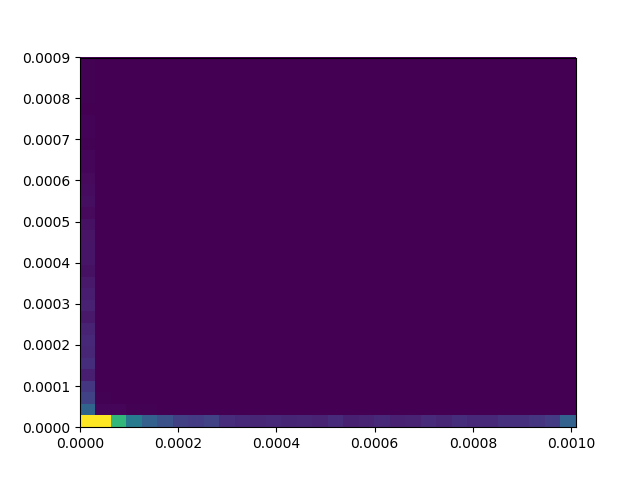

In [26]:
_range = None
cmin, cmax = 0, 100000
plotting.plot_hist_2d(features[:, 0], features[:, 1], 32, _range, cmin, cmax)
plt.clim([0, 2000])

In [30]:
connectivity = celltype.connectivity(centers, n_neighbors=n_neighbors)

In [48]:
region_labels = celltype.cluster(features, 
                                 n_clusters=3,
                                 connectivity=None)

In [35]:
syto16_path = 'syto16_test.zarr'

syto16_arr = io.zarr.open(os.path.join(working_dir, syto16_path))

In [49]:
seg = celltype.rasterize_regions(centers, region_labels, syto16_arr.shape)

<IPython.core.display.Javascript object>


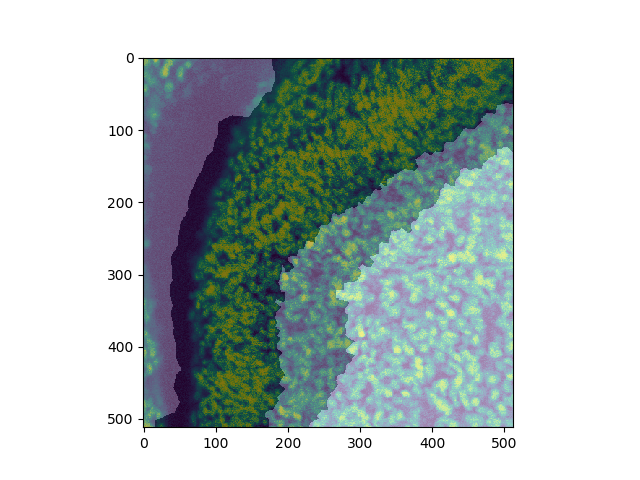

In [50]:
plt.imshow(syto16_arr[8])
plt.imshow(seg[8], alpha=0.5, cmap='gray')
plt.show()

In [ ]:
# TODO: make region rasterization parallelized so that each chunk can
# be processed separately and directly written to disk